## Neural Network
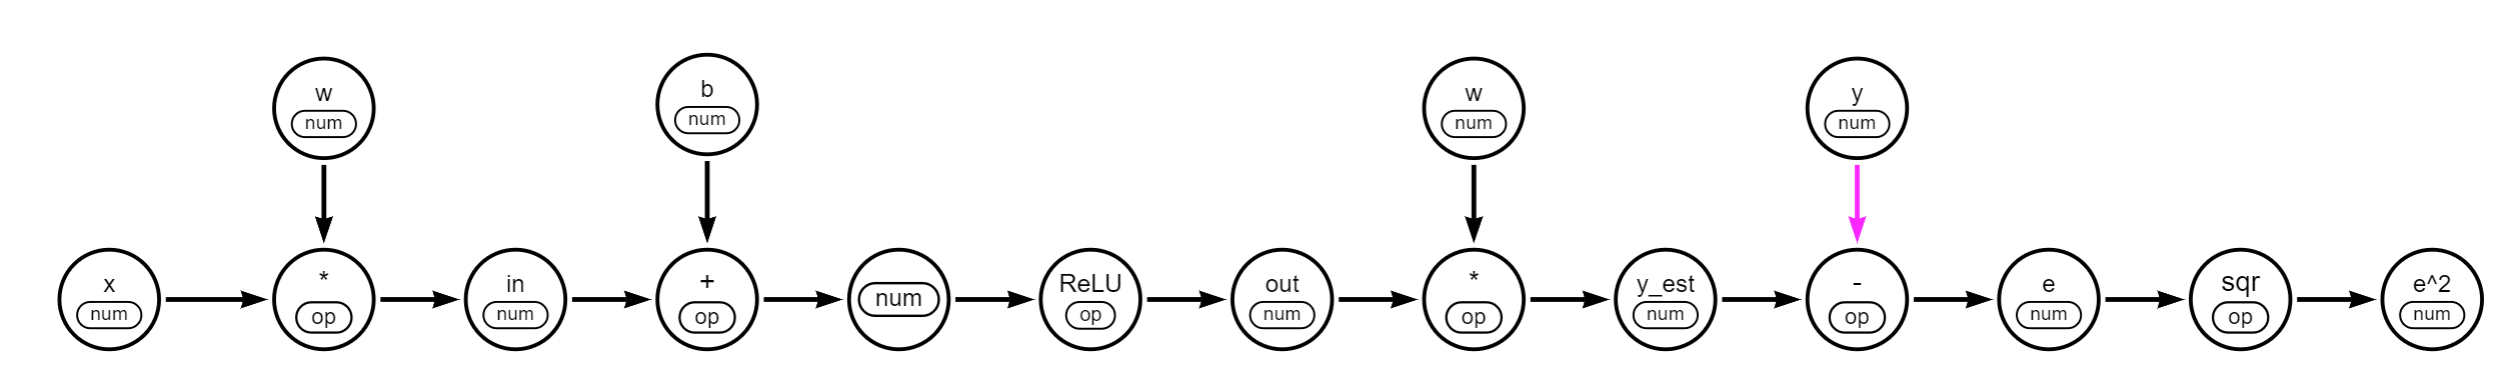

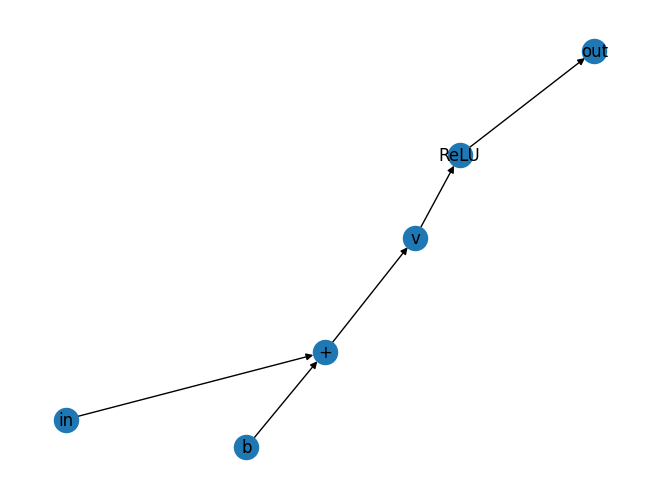

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../trengx')
import engine as te

# Create a directed graph
G = nx.DiGraph()
G.clear()

n= te.Neuron(G)


# Create a mapping for the labels
labels = {node[0]: node[1]['name'] for node in G.nodes(data=True)}

# Draw the graph
nx.draw(G, labels=labels, with_labels=True)

plt.show()


In [2]:
te.forward_propagate(G, x1, 2)
te.forward_propagate(G, x2, 3)
te.forward_propagate(G, x2, 4)
print("v value: ", G.nodes[v]['value'])


NameError: name 'x1' is not defined